<a href="https://colab.research.google.com/github/Yogiii13/Google-Colab-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv("/content/Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


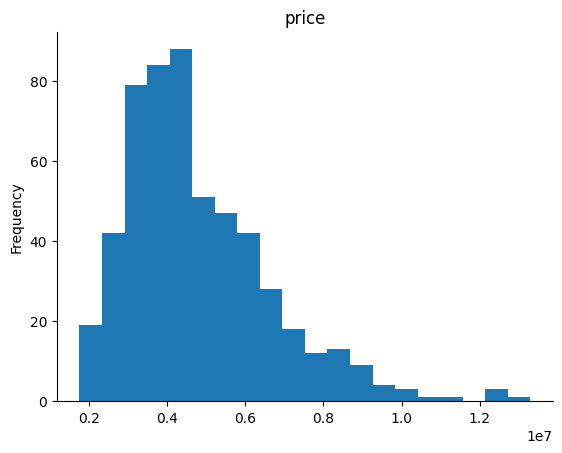

In [ ]:
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

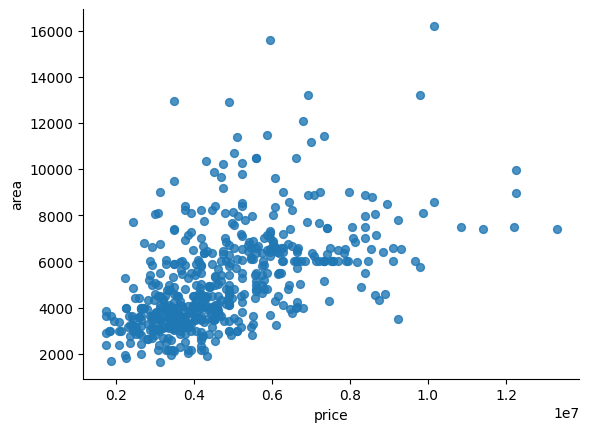

In [ ]:
df.plot(kind='scatter', x='price', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'airconditioning', 'prefarea']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1029010.2874473182


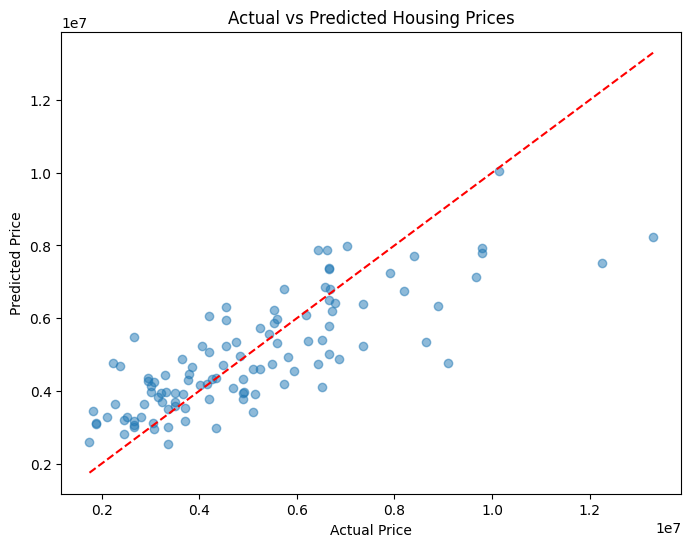

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [ ]:
def predict_price():
    print("Enter house details:")

    area = int(input("Area (in sq. ft): "))
    bedrooms = int(input("Bedrooms: "))
    bathrooms = int(input("Bathrooms: "))
    stories = int(input("Stories: "))
    parking = int(input("Parking spaces: "))
    mainroad = input("Main road? (yes/no): ").lower() == 'yes'
    airconditioning = input("Air conditioning? (yes/no): ").lower() == 'yes'
    prefarea = input("Preferred area? (yes/no): ").lower() == 'yes'

    data = [[area, bedrooms, bathrooms, stories, parking, int(mainroad), int(airconditioning), int(prefarea)]]
    price = model.predict(data)[0]
    print(f"\n🏡 Predicted Price: ₹{price:,.0f}")
predict_price()

Enter house details:
Area (in sq. ft): 400
Bedrooms: 2
Bathrooms: 2
Stories: 1
Parking spaces: 1
Main road? (yes/no): 1
Air conditioning? (yes/no): 0
Preferred area? (yes/no): 1

🏡 Predicted Price: ₹3,315,128


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
